                                                                    DOCKER学习

b站教学视频

https://www.bilibili.com/video/BV1s54y1n7Ev/?spm_id_from=333.337.search-card.all.click&vd_source=4b8e5a437540b388abe0e0e23e80b583


https://www.bilibili.com/video/BV1Dm4y147eM/?spm_id_from=333.337.search-card.all.click&vd_source=4b8e5a437540b388abe0e0e23e80b583

docker的逻辑

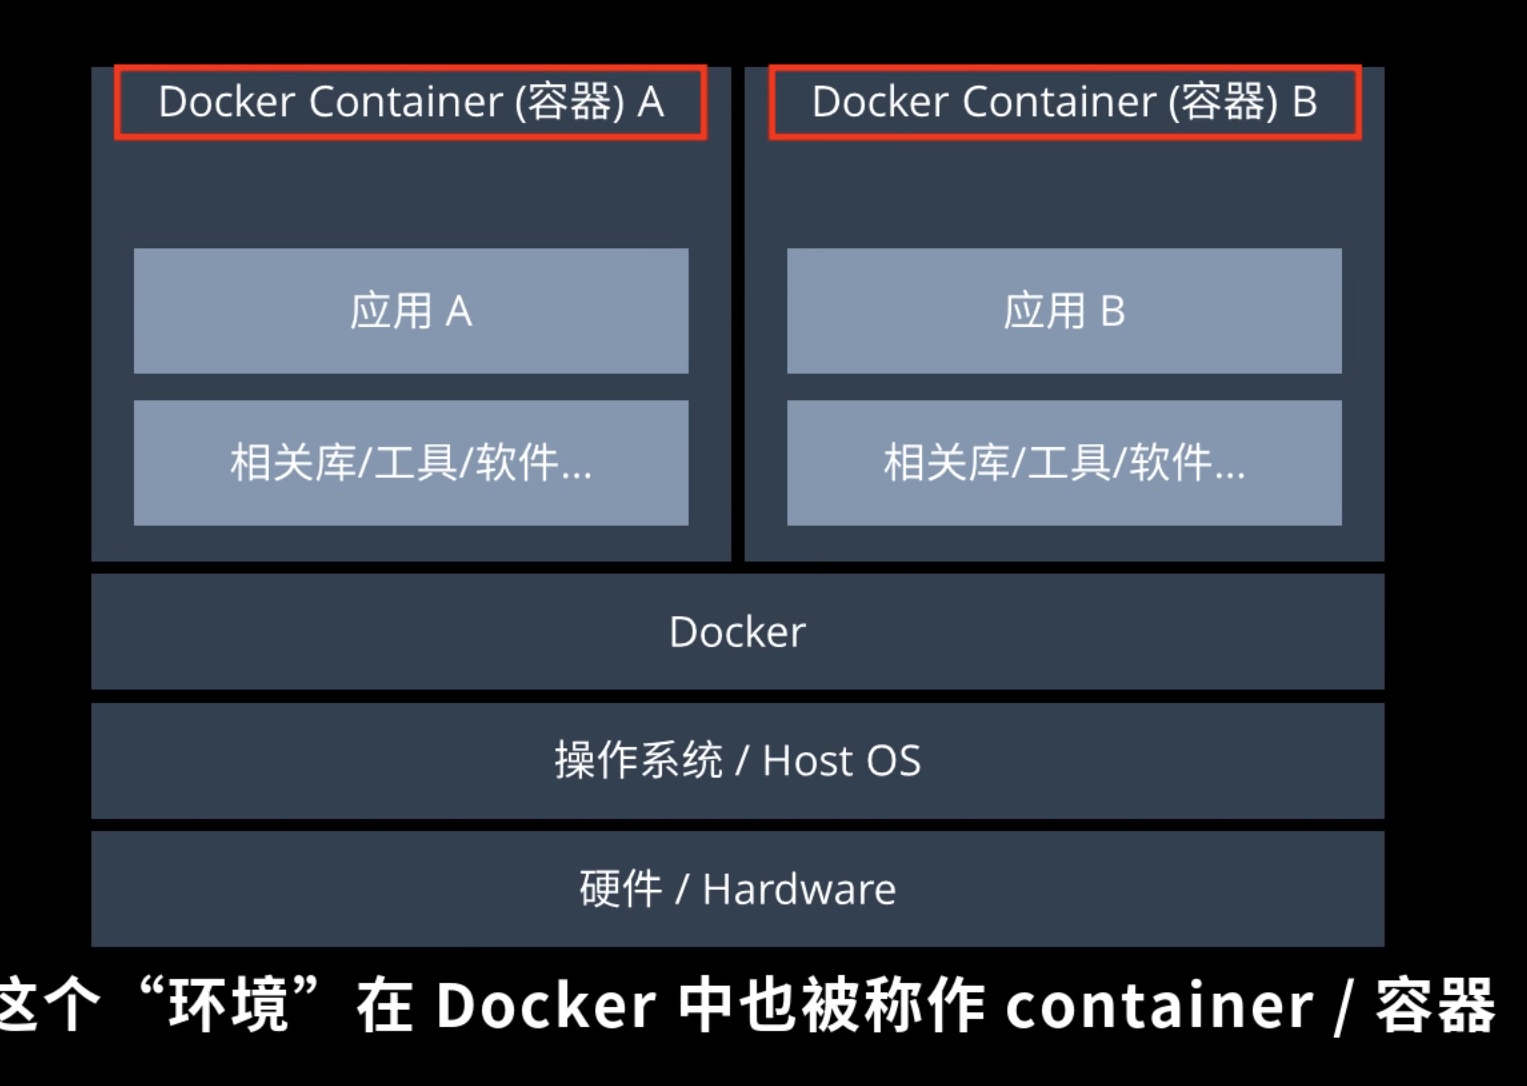


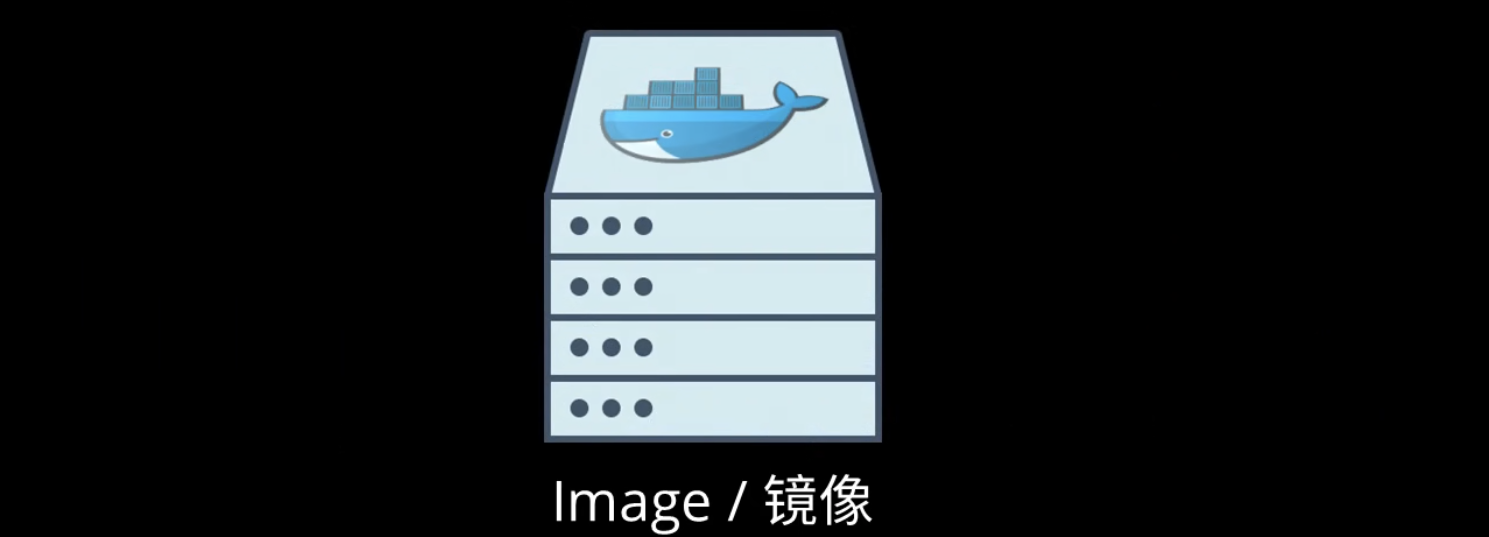


创建下面的bash文件,并且运行(在本地环境不是docker中):

```python
# 添加 NVIDIA 包仓库
distribution=$(. /etc/os-release;echo IDIDVERSION_ID)
curl -fsSL https://nvidia.github.io/libnvidia-container/gpgkey | sudo gpg --dearmor -o /usr/share/keyrings/nvidia-container-toolkit-keyring.gpg
curl -s -L https://nvidia.github.io/libnvidia-container/$distribution/nvidia-container-toolkit.list | \
  sed 's#deb https://#deb [signed-by=/usr/share/keyrings/nvidia-container-toolkit-keyring.gpg] https://#g' | \
  sudo tee /etc/apt/sources.list.d/nvidia-container-toolkit.list

# 更新包并安装工具包
sudo apt-get update
sudo apt-get install -y nvidia-container-toolkit
sudo nvidia-ctk runtime configure
sudo systemctl restart docker


使用下面的这段代码进入docker环境:
需要说明的是,后面是你的挂载目录,也就是你的代码目录,每个人不一样自己修改,mmdet是你创建的容器名称

docker run --gpus all -it -v /home/shi/Desktop/models/BEVDet:/workspace mmdet bash

然后可以在vscode中的containers中右键停止或者连接shell;

测试上面的脚本文件可以使用:

nvidia-smi


进入官方教程

https://github.com/HuangJunJie2017/BEVDet/tree/dev3.0

现在开始运行step2;因该不会有太多问题:

git clone https://github.com/HuangJunJie2017/BEVDet.git

cd BEVDet

pip install -v -e .

你需要先进入你挂载的目录:

cd /workspace

这里即使操作正确也无法成功安装docker,并且解决依赖.需要进行一些改变

更新

conda update --force conda

conda install --force-reinstall numba llvmlite

重装numpy到1.20版本以下:

conda install numpy==1.19.5

过程中有pandas报错,无法导入一个东西,请尝试使用conda安装pandas然后进行降级(单独安装这两个之中的哪个版本都不行):

conda install pandas

conda install pandas==1.3.3



还可能有很多其他的问题:

ModuleNotFoundError: No module named 'spconv'

使用 nvcc --version 查看cuda版本.然后运行(例如11.7)

pip install spconv-cu117 



最后一个错误,yapf版本不兼容,使用下面代码降低版本:

pip install yapf==0.32.0


正常运行,完结撒花

数据集制作和训练代码实例,后者加入coonfig才能正常运行

python tools/create_data_bevdet.py

python tools/train.py /workspace/configs/bevdet/bevdet-r50-4d-cbgs.py